In [1]:
# importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [4]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [5]:
 # Loading the dataset
 data = pd.read_csv('/content/marketing_campaign (2).csv', sep="\t")
 print("Number of datapoints:", len(data))
 data.head()


Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# To remove the NA values
data = data.dropna()
print("The total number of datapoints after removing the NA values:", len(data))

The total number of datapoints after removing the NA values: 2216


In [8]:
# Change the datatype Dt_customer
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'], dayfirst=True)
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

In [9]:
# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date:", max(dates))
print("The oldest customer's enrolment date:", min(dates))

The newest customer's enrolment date: 2014-06-29
The oldest customer's enrolment date: 2012-07-30


In [10]:
# Created s feature "customer_for"
days= []
d1 = max(dates) #taking it to be newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data['Customer_for'] = days
data['Customer_for'] = pd.to_numeric(data['Customer_for'], errors="coerce")

In [11]:
print("Total categories in the feature Marital_Status\n", data["Marital_Status"].value_counts(),"\n" )
print("Total categories in the feature Education\n", data["Education"].value_counts())

Total categories in the feature Marital_Status
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [12]:
#Feature Engineering

#Age of customer today
data["Age"] = 2025-data["Year_Birth"]

#Total spending on various items
data["Spend"] = data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+data["MntFishProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]

#Deriving living situation by marital status "Alone"
data["Living_With"] =data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"One"})

In [13]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"] + data["Teenhome"]

#Features for total members in the household
data["Family_Size"]=data["Living_With"].replace({"Alone":1, "Partner":2, "One":1})+data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data["Children"]>0, 1, 0)

#Segmenint Education levels in three groups
data["Education"] = data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate","Master":"Postgraduate","PhD":"Postgraduate"})

# For Clarity
data=data.rename(columns={"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Droping some of the redundant features
to_drop = ["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Marital_Status"]
data =data.drop(to_drop, axis=1)

/tmp/ipython-input-3759316413.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"]=data["Living_With"].replace({"Alone":1, "Partner":2, "One":1})+data["Children"]


In [14]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spend,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,132.000000,2525.000000,3.000000,5.000000,1.000000


Relative plot of some selected features : A Data Subset


<Figure size 800x550 with 0 Axes>

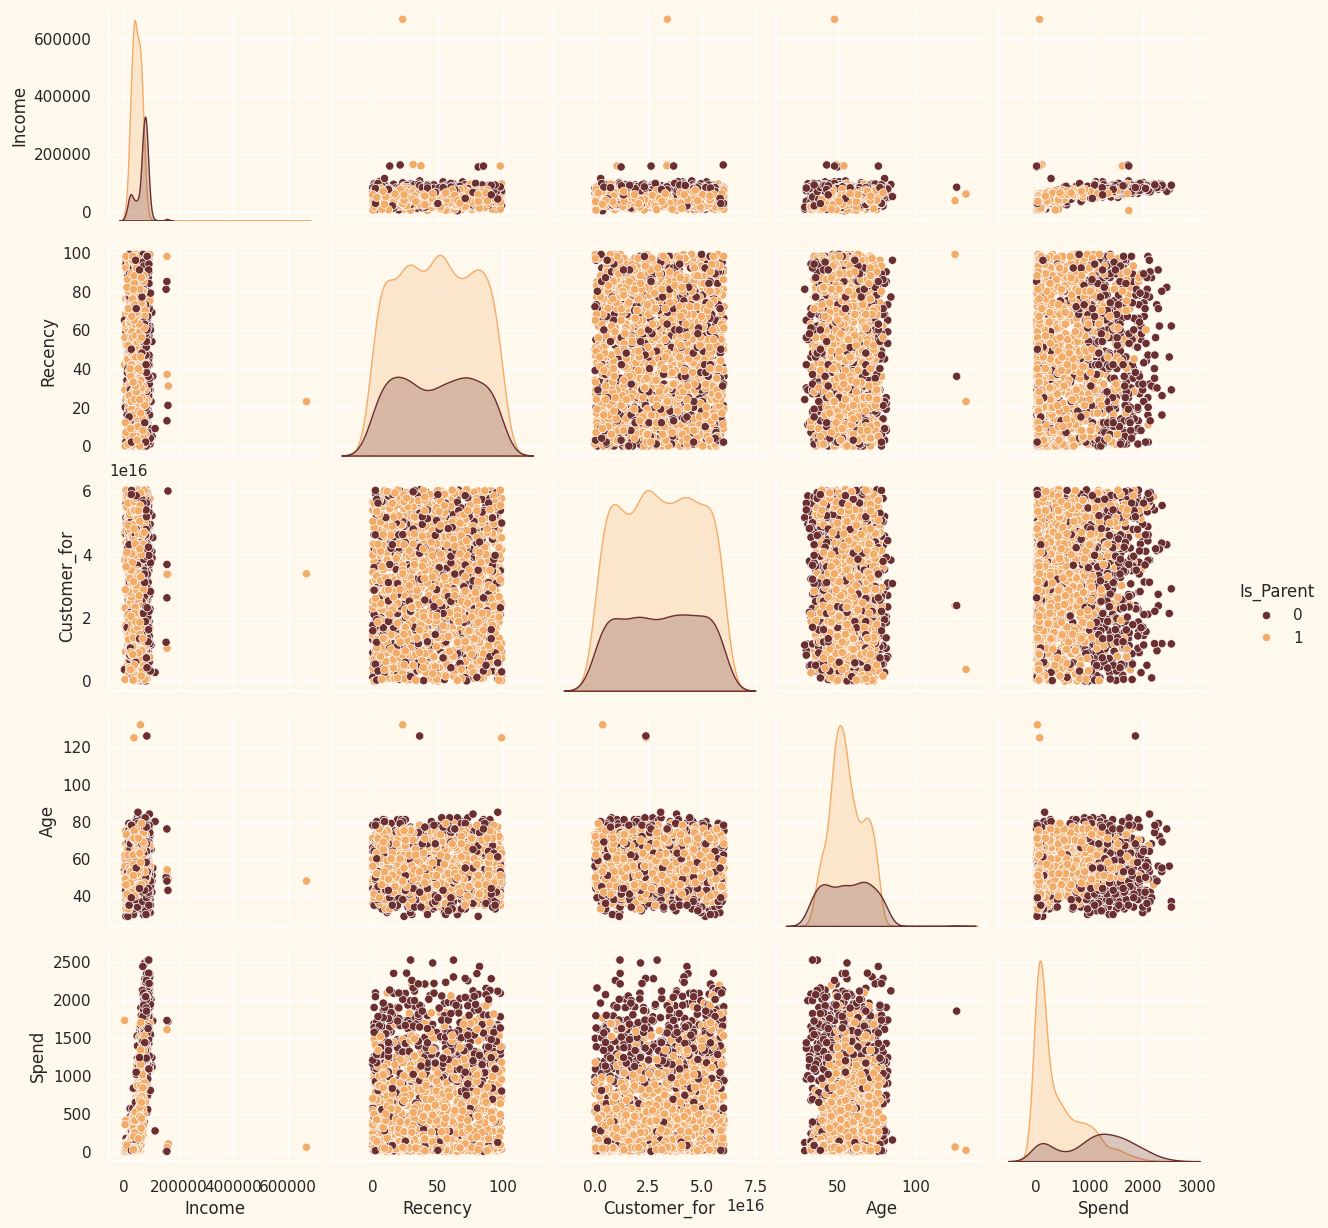

In [17]:
#To plot some selected features

#Setting of colors preferences
sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})
pallet = ["#6B2F2F","#9E726F","#D6B2B1","#B9C069","#9F8A78","#F3AB68"]
cmap = colors.ListedColormap(["#6B2F2F","#9E726F","#D6B2B1","#B9C069","#9F8A78","#F3AB68"])

#Plotting following features
To_Plot = ["Income", "Recency", "Customer_for", "Age", "Spend", "Is_Parent"]
print("Relative plot of some selected features : A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue = "Is_Parent", palette =(["#6B2F2F","#F3AB68"]))

#Taking Hue
plt.show()

In [19]:
#Droping the outliers by setting a cap on Age and Income
data = data[(data["Age"]<90)]
data = data[(data["Income"]) < 600000]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [21]:
#Get list of categorical variable
s = (data.dtypes == 'object')
object_cols= list(s[s].index)

print("Categorical variables in the dataset:" , object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [23]:
#Label Encoding the object dtypes
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(label_encoder.fit_transform)

print("All features are now numerical")

All features are now numerical


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [25]:
#Creating a copy of data
ds = data.copy()

# Creatinng a subset of dataframe by droping the features on deals accepted and promotions
cols_del = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response"]

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [26]:
# Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for modeling")
scaled_ds.head()

Dataframe to be used for modeling


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_for,Age,Spend,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.117256,-0.09552,2.375425,1.527721,1.018352,1.676245,-0.689244,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.117256,-0.09552,-0.420977,-1.189011,1.274785,-0.963297,-0.689244,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.117256,-0.09552,-0.420977,-0.206048,0.334530,0.280110,0.679345,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.117256,-0.09552,-0.420977,-1.060584,-1.289547,-0.920135,0.679345,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.117256,-0.09552,-0.420977,-0.951915,-1.033114,-0.307562,0.679345,0.069987,0.449070,0.632456


In [27]:
#Initiating PCA to reduce dimensions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=["PC1", "PC2", "PC3"])
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,-1.606109e-16,2.960501,-5.920980,-2.561814,-0.863269,2.267025,8.539756
PC2,2212.0,-1.284887e-17,1.711560,-4.089051,-1.361966,-0.172693,1.258564,6.060595
PC3,2212.0,8.191157e-17,1.388715,-3.160646,-0.785758,-0.162549,0.393624,8.249410


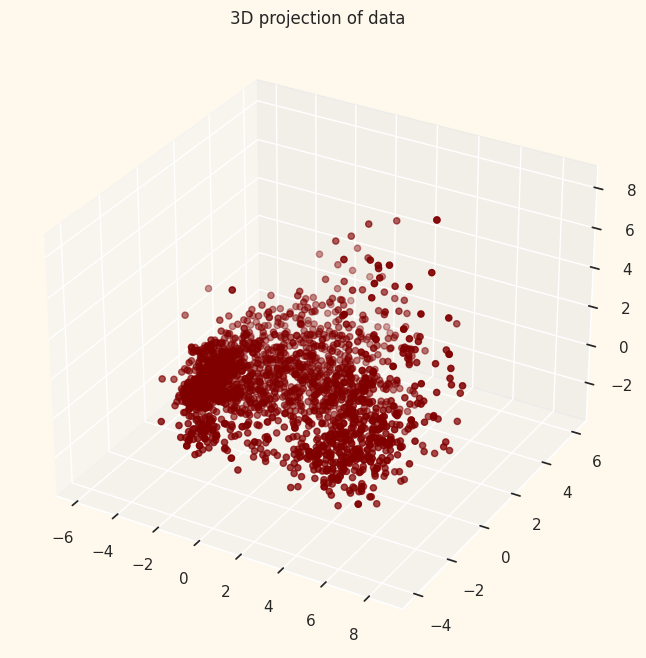

In [30]:
# A 3D projection of data  in the reduce dmension

x = PCA_ds["PC1"]
y = PCA_ds["PC2"]
z = PCA_ds["PC3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c="maroon", marker ="o")
ax.set_title("3D projection of data")
plt.show()

Elbow method to determine the number of clusters to be formed:


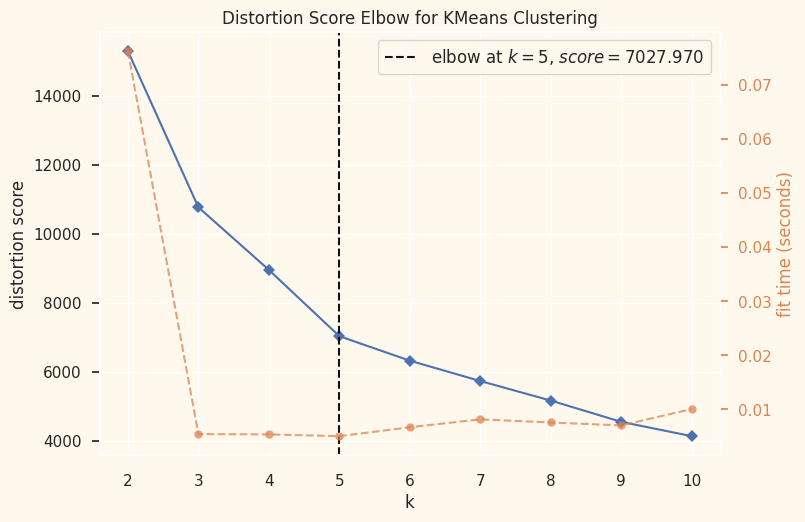

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
#Quick examination of elbow method to find numbers of cluster to make

print("Elbow method to determine the number of clusters to be formed:")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [32]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# Adding the clusters feature to the original dataframe
data["Clusters"] =yhat_AC


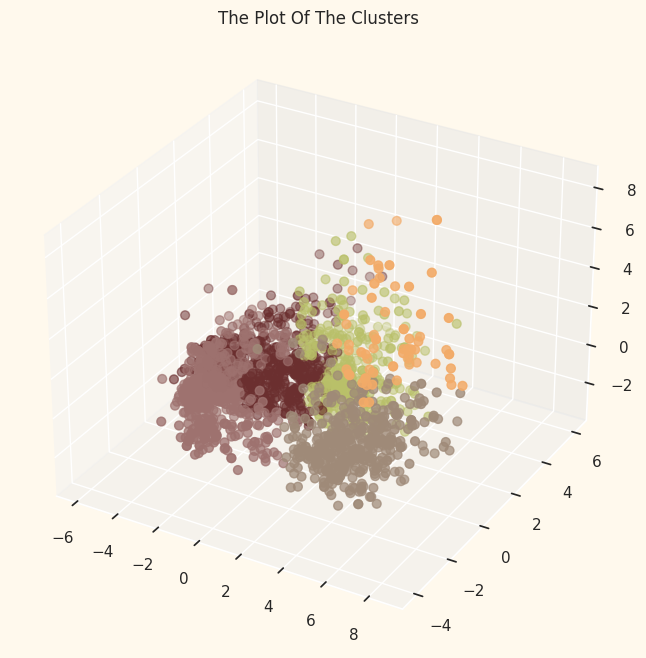

In [34]:
# Plotting the clusters
fig =plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x,y,z, s=40, c=PCA_ds["Clusters"], marker ='o', cmap =cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

/tmp/ipython-input-1171625311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x =data["Clusters"], palette = pal )
/tmp/ipython-input-1171625311.py:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x =data["Clusters"], palette = pal )


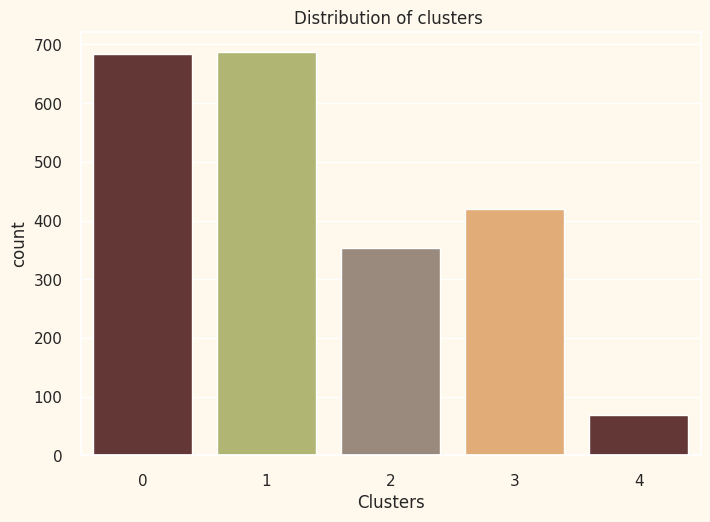

In [36]:
# Plotting countplot of clusters
pal = ["#6B2F2F","#B9C069","#9F8A78","#F3AB68"]
pl = sns.countplot(x =data["Clusters"], palette = pal )
pl.set_title("Distribution of clusters ")
plt.show()

/tmp/ipython-input-102378140.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.scatterplot(data = data,x=data["Spend"], y=data["Income"],hue=data["Clusters"], palette= pal)


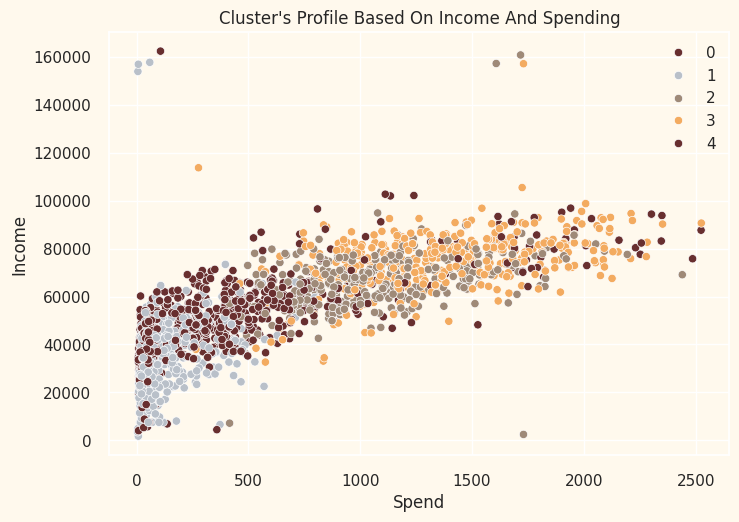

In [39]:
pl = sns.scatterplot(data = data,x=data["Spend"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipython-input-171325847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

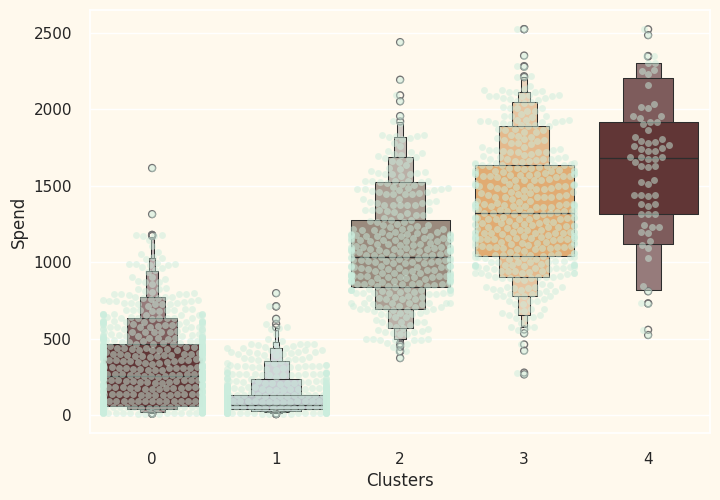

In [40]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spend"], palette=pal)
plt.show()

/tmp/ipython-input-876846100.py:5: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)


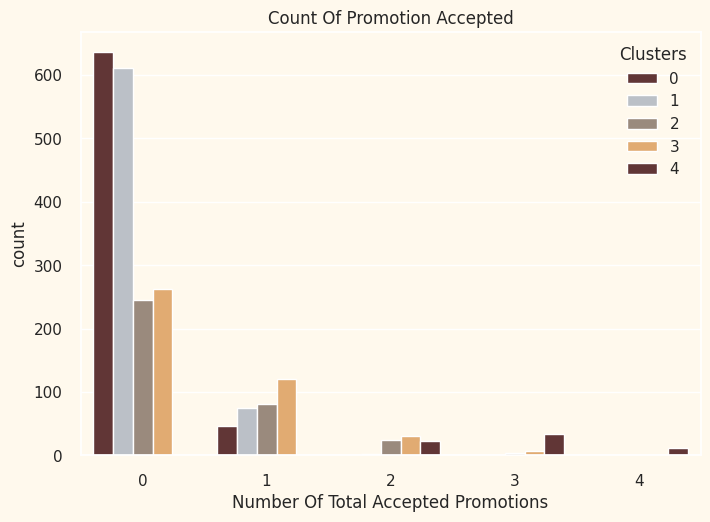

In [41]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

/tmp/ipython-input-2174481357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
/tmp/ipython-input-2174481357.py:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)


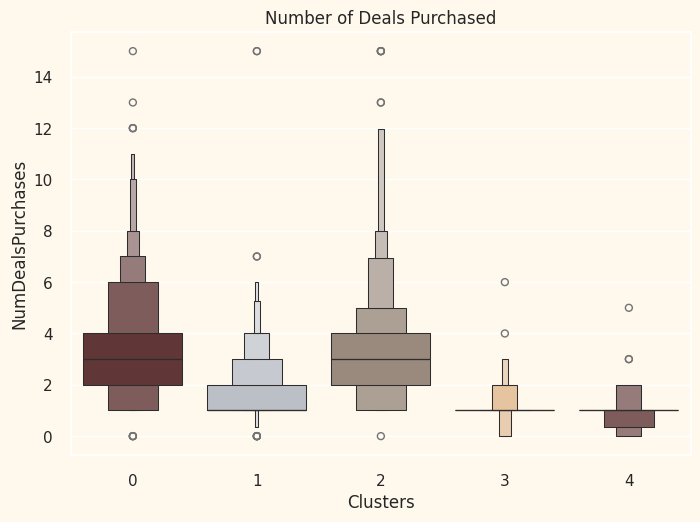

In [42]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

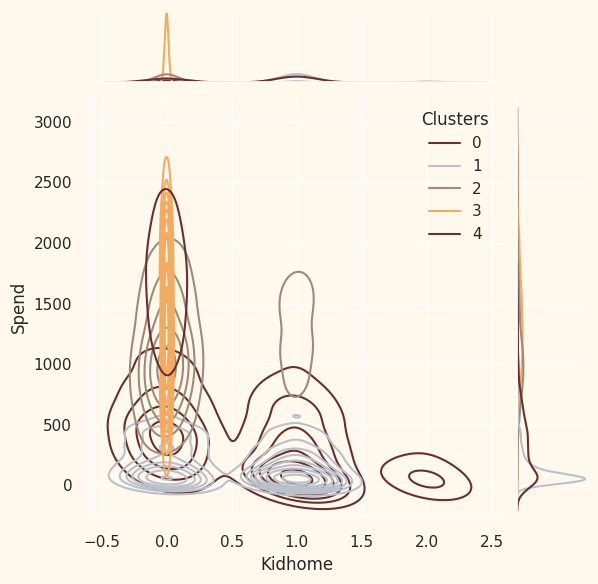

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

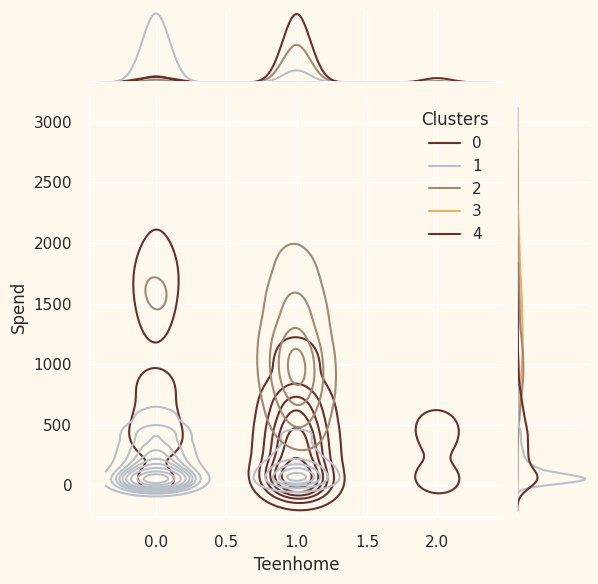

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

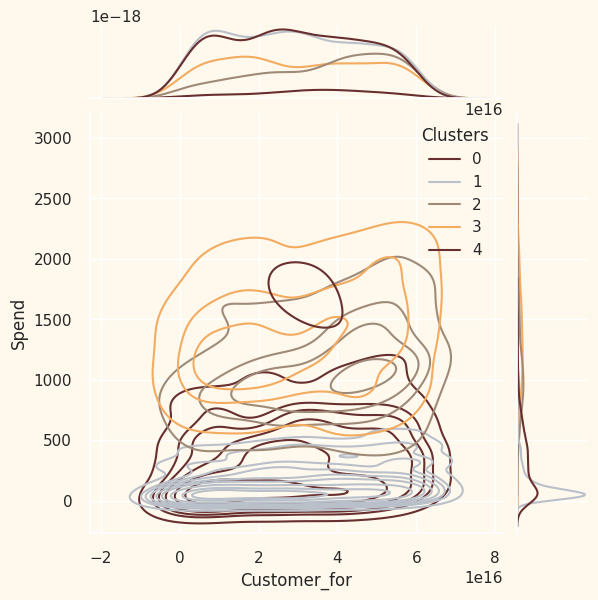

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

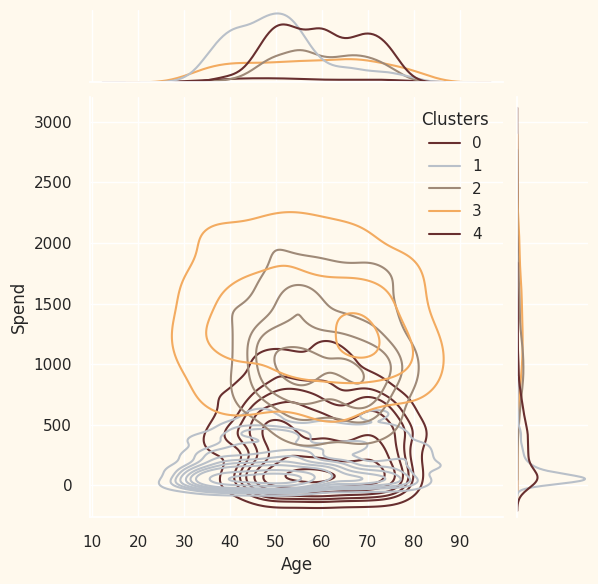

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

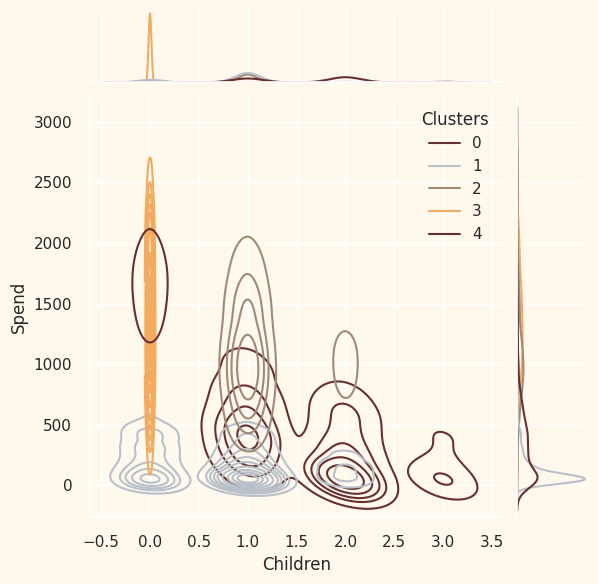

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

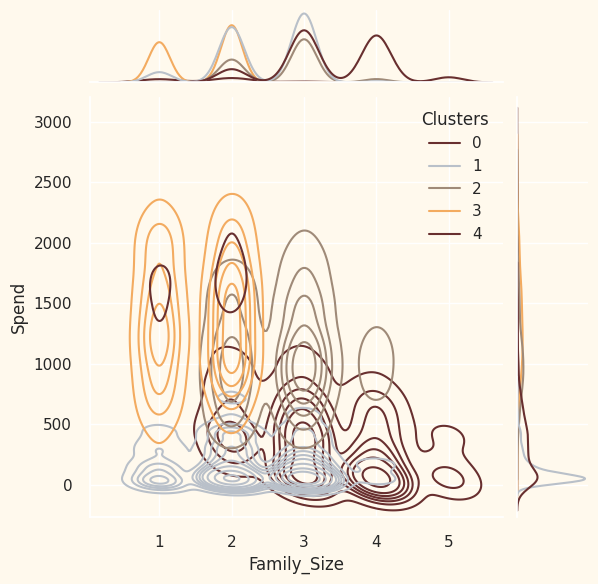

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

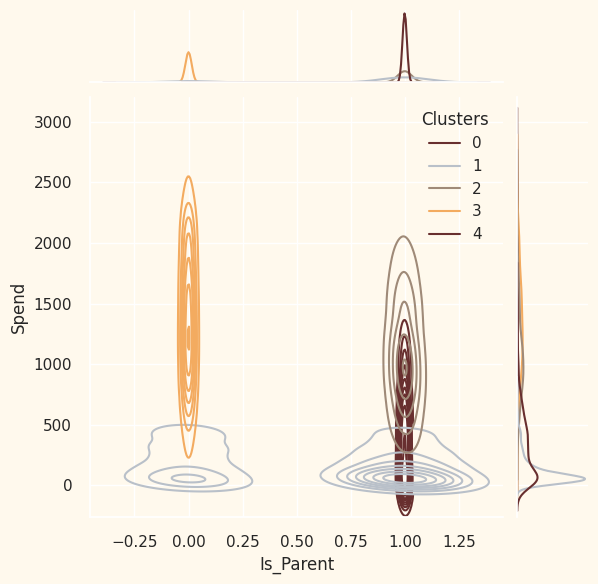

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

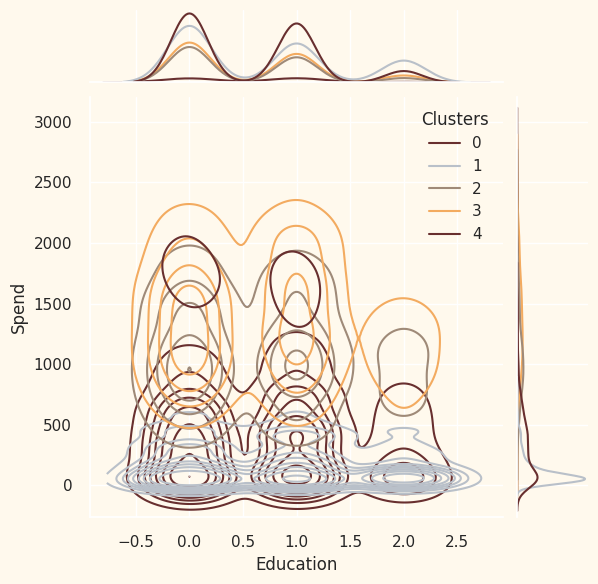

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

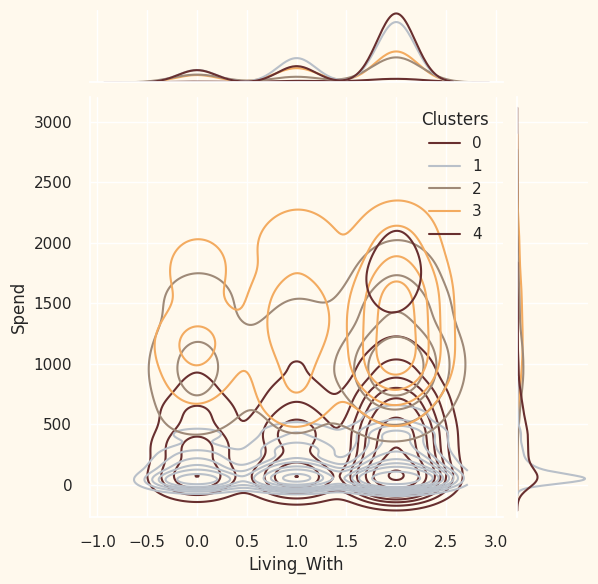

In [45]:
Personal = [ "Kidhome","Teenhome","Customer_for", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spend"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()